In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


C:\Users\Kadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index'>

<Figure size 3600x720 with 0 Axes>

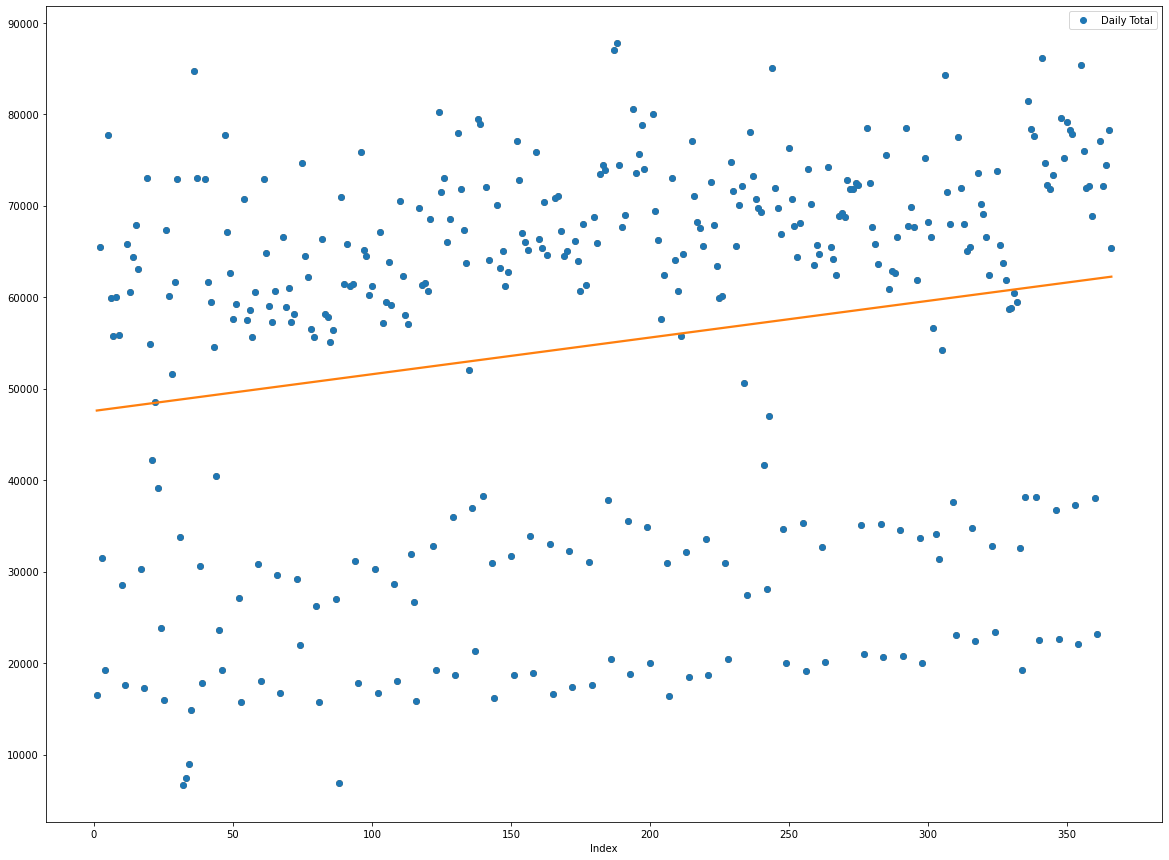

In [2]:
### Reading xlsx file

df = pd.read_excel('HW2_data.xlsx')

plt.figure(figsize=(50,10))

df.plot(x='Index', y='Daily Total', style='o', figsize=(20,15))

x = df['Index']
x = np.array(x)
y = df['Daily Total']
y = np.array(y)

sns.regplot(x, y, ci=None)


C:\Users\Kadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index'>

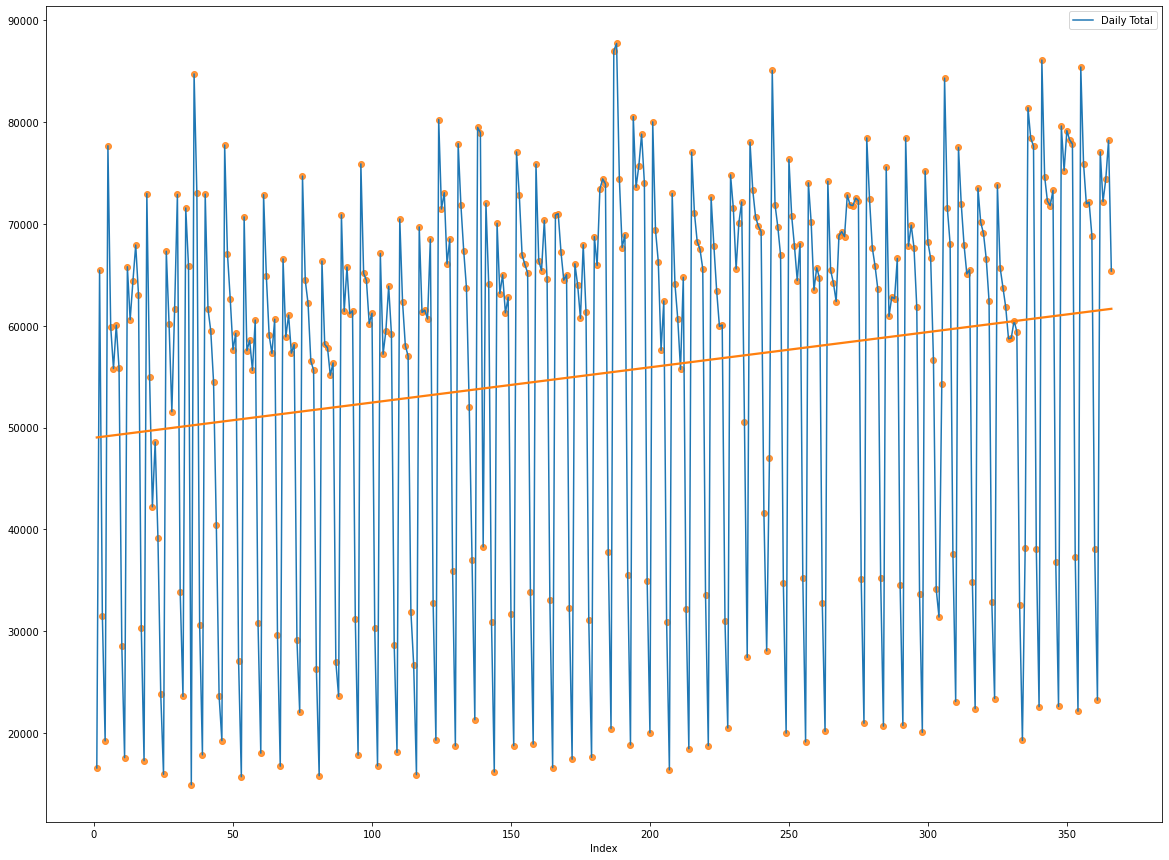

In [3]:
#I found mean of outliers in 12 month seasonality
Mean88 = df.loc[df['Index'] % 7 == 4, 'Daily Total'].mean()
Mean32 = df.loc[df['Index'] % 7 == 4, 'Daily Total'].mean()
Mean33 = df.loc[df['Index'] % 7 == 5, 'Daily Total'].mean()
Mean34 = df.loc[df['Index'] % 7 == 6, 'Daily Total'].mean()

#Enter means for outlier entries
df.at[87, 'Daily Total'] = Mean88
df.at[31, 'Daily Total'] = Mean32
df.at[32, 'Daily Total'] = Mean33
df.at[33, 'Daily Total'] = Mean34


#Plotting updated data
df.plot(x='Index', y='Daily Total', style='-', figsize=(20,15))
x = df['Index']
x = np.array(x)
y = df['Daily Total']
y = np.array(y)

sns.regplot(x, y, ci=None)



In [4]:
#Splitting data to train and test

Index = df['Index'] 
df['İndex'] = pd.Series(Index)


X_Train = df[0:275]
X_Test = df[275:367]

#SOME DATA MANİPULATİON

X_Train.drop('Index', inplace=True, axis=1)
X_Train.drop('Date', inplace=True, axis=1)

X_Train.rename(columns = {'Daily Total':'daily_total'}, inplace = True)
X_Train.rename(columns = {'İndex':'index'}, inplace = True)

X_Test.drop('Date', inplace=True, axis=1)
X_Test.drop('İndex', inplace=True, axis=1)

X_Test.rename(columns = {'Daily Total':'daily_total'}, inplace = True)
X_Test.rename(columns = {'Index':'index'}, inplace = True)


X_Test = X_Test.reset_index()
X_Test.drop('level_0', inplace=True, axis=1)


C:\Users\Kadir\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Kadir\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
####  Obtaining other predictors ####

X_Train['sqrtd'] = np.sqrt(X_Train['index'])

daily_total_7 = np.pad(X_Train['daily_total'],(7,0),mode='constant')

X_Train = X_Train.reindex(list(range(0, 282))).reset_index(drop=True)
X_Train['daily_total_7'] = pd.Series(daily_total_7)



daily_total_28 = np.pad(X_Train['daily_total'],(28,0),mode='constant')

X_Train = X_Train.reindex(list(range(0, 303))).reset_index(drop=True)
X_Train['daily_total_28'] = pd.Series(daily_total_28)

C:\Users\Kadir\AppData\Local\Temp/ipykernel_12816/15290773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Train['sqrtd'] = np.sqrt(X_Train['index'])


In [6]:
####  Obtaining other predictors for test set ####


X_Test['sqrtd'] = np.sqrt(X_Test['index'])

daily_total_7 = np.pad(X_Test['daily_total'],(7,0),mode='constant')

X_Test = X_Test.reindex(list(range(0, 282))).reset_index(drop=True)
X_Test['daily_total_7'] = pd.Series(daily_total_7)


daily_total_28 = np.pad(X_Test['daily_total'],(28,0),mode='constant')

X_Test = X_Test.reindex(list(range(0, 303))).reset_index(drop=True)
X_Test['daily_total_28'] = pd.Series(daily_total_28)


In [7]:
lm = sm.OLS.from_formula('daily_total ~ index + sqrtd + daily_total_7 + daily_total_28', data=X_Train)
resulttrain = lm.fit()
resulttrain.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            daily_total   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     196.7
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.01e-78
Time:                        17:00:26   Log-Likelihood:                -2926.7
No. Observations:                 275   AIC:                             5863.
Df Residuals:                     270   BIC:                             5882.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.887e+04   4204.136     11.623      0.000    4.06e+04    5.71e+04
index            330.5974     42.213      7.832      0.000     247.490     413.705
sqrtd          -7693.7381    902.726     -8.523      0.000   -9471.014   -5916.462
daily_total_7      0.5254      0.044     11.856      0.000       0.438       0.613
daily_total_28     0.3639      0.045      8.158      0.000       0.276       0.452
==============================================================================
Omnibus:                       30.343   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.855
Skew:                           0.130   Prob(JB):                     1.43e-34
Kurtosis:                       6.679   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X_Train = X_Train.dropna()
X_Test = X_Test.dropna()

x_train = X_Train.values.reshape(-1, 1) 
y_train = X_Train['daily_total'].values.reshape(-1, 1)

x_test = X_Test.values.reshape(-1, 1) 
y_test = X_Test['daily_total'].values.reshape(-1, 1) 

# we'll experiment with small lasso coefficients, sometimes the range of relevant coefficients takes some trial and error.
# let's generate 100 penalty coefficients ranging from alpha=0.0000001 to alpha= 0.001
alphas = np.linspace(0.0000001,0.001,100)


In [9]:
lasso = Lasso(max_iter=50000, normalize=True) # let's normalize the data so that all predictors are of the same scale
coefs = [] # we'll collect the lasso coefficients, the mse in the test set and the mse in the training set for each value of alpha
mses = []
msetrains=[]
for a in alphas:
 lasso.set_params(alpha=a)
 lasso.fit(x_train, y_train)   # this implements the lasso with the above value of alpha=a for the training set
 coefs.append(lasso.coef_) # recovers the coefficients of the predictors
 mse_test=mean_squared_error(y_test, lasso.predict(x_test)) # the MSE in the test set
 mse_train=mean_squared_error(y_train, lasso.predict(x_train)) # the MSE in the training set
 mses.append(mse_test)   
 msetrains.append(mse_train)   

# we can plot the coefficients of predictors as a function of alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


ValueError: Found input variables with inconsistent numbers of samples: [1375, 275]

In [ ]:
# Calculation of RMSE and MSE

residuals1=np.array(resulttrain.resid)
msetrain = np.mean(np.square(residuals1))
rmsetrain = np.sqrt(msetrain)
print('MSE Train = ' , msetrain )
print('RMSE Train = ', rmsetrain )

In [ ]:
lm = sm.OLS.from_formula('daily_total ~ index + sqrd + sqrtd + daily_total_7 + daily_total_14 + log_index + daily_total_21 + daily_total_28', data=X_Test)
resultest = lm.fit()
resultest.summary()


In [ ]:
# Calculation of RMSE and MSE

residuals2=np.array(resultest.resid)
mseTest = np.mean(np.square(residuals2))
rmseTest = np.sqrt(mseTest)
print('MSE Test = ' , mseTest )
print('RMSE Test = ', rmseTest )